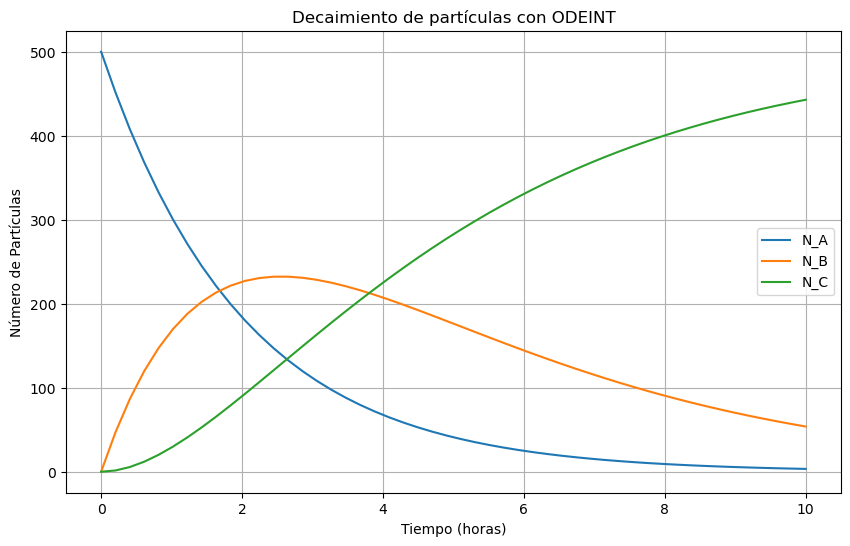

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir la función que representa el sistema de ecuaciones diferenciales
def sistema_ecuaciones(N, t, k1, k2):
    NA, NB, NC = N

    dNA_dt = -k1 * NA
    dNB_dt = k1 * NA - k2 * NB
    dNC_dt = k2 * NB

    return [dNA_dt, dNB_dt, dNC_dt]

# Condiciones iniciales
N0 = [500, 0, 0]

k1 = 0.5  # particulas/h
k2 = 0.3  # particulas/h

t = np.linspace(0, 10, 50)  # entre 0 y 10 horas con 50 pasos temporales

solucion = odeint(sistema_ecuaciones, N0, t, args=(k1, k2))
plt.figure(figsize=(10, 6))
plt.plot(t, solucion[:, 0], label='N_A')
plt.plot(t, solucion[:, 1], label='N_B')
plt.plot(t, solucion[:, 2], label='N_C')
plt.title('Decaimiento de partículas con ODEINT')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de Partículas')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
for i, tiempo in enumerate(t):
    print(f"Tiempo: {tiempo:.2f} horas - N_A: {solucion[i, 0]:.2f}, N_B: {solucion[i, 1]:.2f}, N_C: {solucion[i, 2]:.2f}")

Tiempo: 0.00 horas - N_A: 500.00, N_B: 0.00, N_C: 0.00
Tiempo: 0.20 horas - N_A: 451.50, N_B: 47.02, N_C: 1.48
Tiempo: 0.41 horas - N_A: 407.70, N_B: 86.69, N_C: 5.61
Tiempo: 0.61 horas - N_A: 368.15, N_B: 119.89, N_C: 11.96
Tiempo: 0.82 horas - N_A: 332.44, N_B: 147.39, N_C: 20.17
Tiempo: 1.02 horas - N_A: 300.19, N_B: 169.90, N_C: 29.91
Tiempo: 1.22 horas - N_A: 271.07, N_B: 188.05, N_C: 40.89
Tiempo: 1.43 horas - N_A: 244.77, N_B: 202.37, N_C: 52.86
Tiempo: 1.63 horas - N_A: 221.03, N_B: 213.37, N_C: 65.60
Tiempo: 1.84 horas - N_A: 199.59, N_B: 221.49, N_C: 78.93
Tiempo: 2.04 horas - N_A: 180.22, N_B: 227.11, N_C: 92.67
Tiempo: 2.24 horas - N_A: 162.74, N_B: 230.57, N_C: 106.69
Tiempo: 2.45 horas - N_A: 146.95, N_B: 232.18, N_C: 120.87
Tiempo: 2.65 horas - N_A: 132.70, N_B: 232.21, N_C: 135.09
Tiempo: 2.86 horas - N_A: 119.83, N_B: 230.90, N_C: 149.27
Tiempo: 3.06 horas - N_A: 108.20, N_B: 228.46, N_C: 163.34
Tiempo: 3.27 horas - N_A: 97.71, N_B: 225.07, N_C: 177.23
Tiempo: 3.47 hor

In [3]:
# Función de incremento usando el método de Runge-Kutta de orden 4
def Increment(f, r, t, h):
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    return r + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0


# Función de integración adaptativa tipo Fehlberg
def Adaptativo(f, r0, t, e=1e-4):
    """Método adaptativo tipo Fehlberg"""
    # Inicialización
    TimeVector = [t[0]]
    Vectors = [r0]
    h = t[1] - t[0]
    r = np.array(r0)
    Steps = 0
    
    while t[-1] - t[0] > 0 and Steps < 45:
        r1 = Increment(f, r, t[0], h)
        r2 = Increment(f, r1, t[0] + h, h)
        rt = Increment(f, r, t[0], 2 * h)
        error = np.linalg.norm(r2 - rt)
        
        # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t[0] += 2 * h
            r = rt
            
            TimeVector.append(t[0])
            Vectors.append(r)
        # Si el error es muy grande, cambie el paso
        #Según Fehlberg
        q = 0.85 * (e / error) ** 0.25
        h *= q
        Steps += 1
    
    return TimeVector, Vectors

def sistema_ecuaciones(r, t):
    NA, NB, NC = r
    dNA_dt = -k1 * NA
    dNB_dt = k1 * NA - k2 * NB
    dNC_dt = k2 * NB
    return np.array([dNA_dt, dNB_dt, dNC_dt])

# Condiciones iniciales
N0 = [500, 0, 0]  # N0 = [500, 0, 0]

# Parámetros
k1 = 0.5
k2 = 0.3

t = np.linspace(0, 10, 50)

TimeVector, Vectors = Adaptativo(sistema_ecuaciones, np.array(N0), t)

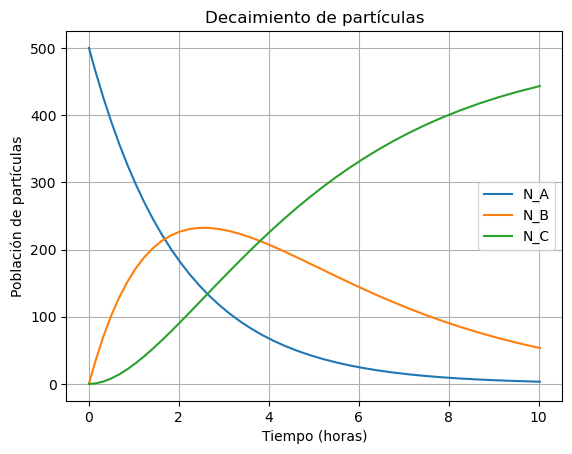

In [4]:
#print(Vectors)
Vectorsarray=np.array(Vectors)
plt.plot(TimeVector,Vectorsarray[:,0], label='N_A')
plt.plot(TimeVector,Vectorsarray[:,1], label='N_B')
plt.plot(TimeVector,Vectorsarray[:,2], label='N_C')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Población de partículas')
plt.title('Decaimiento de partículas')
plt.legend()
plt.grid(True)
plt.show()

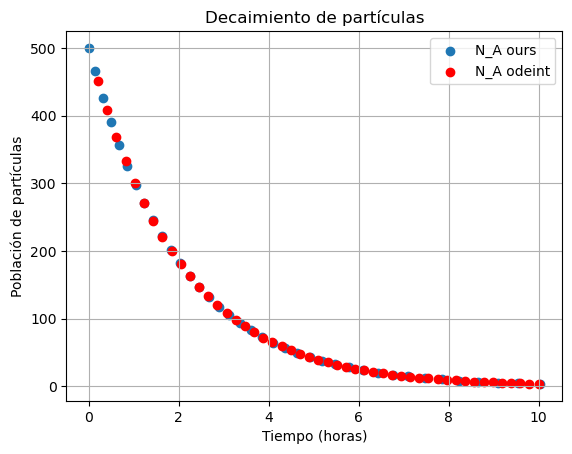

In [5]:
plt.scatter(TimeVector,Vectorsarray[:,0], label='N_A ours')
plt.scatter(t[1:], solucion[1:, 0], label='N_A odeint', color='r')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Población de partículas')
plt.title('Decaimiento de partículas')
plt.legend()
plt.grid(True)
plt.show()

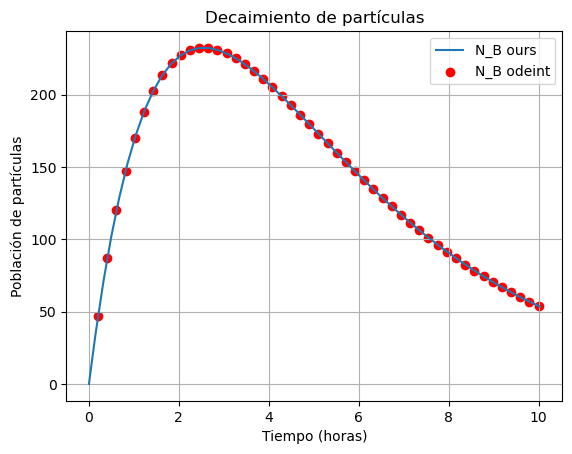

In [6]:
plt.plot(TimeVector,Vectorsarray[:,1], label='N_B ours')
plt.scatter(t[1:], solucion[1:, 1], label='N_B odeint', color='r' )
plt.xlabel('Tiempo (horas)')
plt.ylabel('Población de partículas')
plt.title('Decaimiento de partículas')
plt.legend()
plt.grid(True)
plt.show()

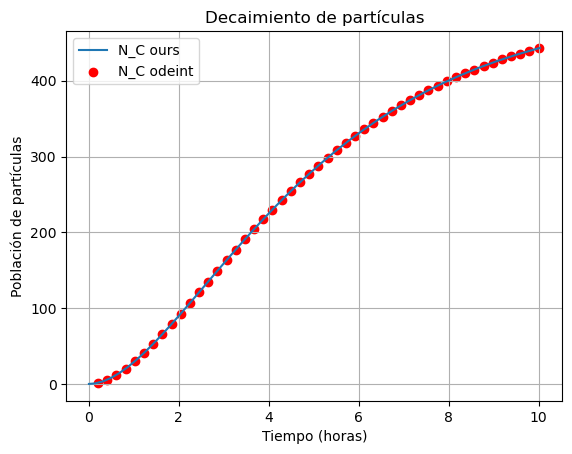

In [7]:
plt.plot(TimeVector,Vectorsarray[:,2], label='N_C ours')
plt.scatter(t[1:], solucion[1:, 2], label='N_C odeint', color='r' )
plt.xlabel('Tiempo (horas)')
plt.ylabel('Población de partículas')
plt.title('Decaimiento de partículas')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
i = np.argmax(solucion[:, 1])
print("tiempo de maximo B")
print(t[i])
maximo_B_odeint = np.max(solucion[:, 1])
print("Valor maximo de B")
print(maximo_B_odeint)
print("valor de C en maximo B")
print(solucion[i, 2])

tiempo de maximo B
2.6530612244897958
Valor maximo de B
232.21284866825457
valor de C en maximo B
135.08893688126986


In [10]:
i = np.argmax(Vectorsarray[:,1])
print("tiempo de maximo B con adaptativo")
print(TimeVector[i])
maximo_B = np.max(Vectorsarray[:,1])
print("Valor maximo de B con adaptativo")
print(maximo_B)
print("valor de C en maximo B con adaptativo")
print(Vectorsarray[i, 2])

tiempo de maximo B con adaptativo
2.4520362395724606
Valor maximo de B con adaptativo
232.1920182235787
valor de C en maximo B con adaptativo
121.07845585670766


h) Para que se cumpla condicion fisica para que el numero de particulas de B sea maximo, la derivada de $N_b$ deberia ser cero, de esta manera $\lambda_1 N_A=\lambda_2 N_B$, de modo que $N_B=\frac{\lambda_1 N_A}{\lambda_2}$